In [1]:
?tensor_to_vec

Object `tensor_to_vec` not found.


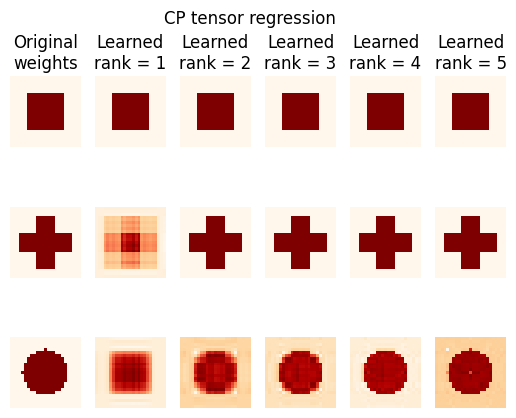

In [1]:
import matplotlib.pyplot as plt
from tensorly.base import tensor_to_vec, partial_tensor_to_vec
from tensorly.datasets.synthetic import gen_image
from tensorly.regression.cp_regression import CPRegressor
import tensorly as tl

# Parameter of the experiment
image_height = 25
image_width = 25
# shape of the images
patterns = ["rectangle", "swiss", "circle"]
# ranks to test
ranks = [1, 2, 3, 4, 5]

# Generate random samples
rng = tl.check_random_state(1)
X = tl.tensor(rng.normal(size=(1000, image_height, image_width), loc=0, scale=1))


# Parameters of the plot, deduced from the data
n_rows = len(patterns)
n_columns = len(ranks) + 1
# Plot the three images
fig = plt.figure()

for i, pattern in enumerate(patterns):

    # Generate the original image
    weight_img = gen_image(
        region=pattern, image_height=image_height, image_width=image_width
    )
    weight_img = tl.tensor(weight_img)

    # Generate the labels
    y = tl.dot(partial_tensor_to_vec(X, skip_begin=1), tensor_to_vec(weight_img))

    # Plot the original weights
    ax = fig.add_subplot(n_rows, n_columns, i * n_columns + 1)
    ax.imshow(tl.to_numpy(weight_img), cmap=plt.cm.OrRd, interpolation="nearest")
    ax.set_axis_off()
    if i == 0:
        ax.set_title("Original\nweights")

    for j, rank in enumerate(ranks):

        # Create a tensor Regressor estimator
        estimator = CPRegressor(
            weight_rank=rank, tol=10e-7, n_iter_max=100, reg_W=1, verbose=0
        )

        # Fit the estimator to the data
        estimator.fit(X, y)

        ax = fig.add_subplot(n_rows, n_columns, i * n_columns + j + 2)
        ax.imshow(
            tl.to_numpy(estimator.weight_tensor_),
            cmap=plt.cm.OrRd,
            interpolation="nearest",
        )
        ax.set_axis_off()

        if i == 0:
            ax.set_title(f"Learned\nrank = {rank}")

plt.suptitle("CP tensor regression")
plt.show()

In [2]:
?tensor_to_vec

Signature: tensor_to_vec(tensor)
Docstring:
Vectorises a tensor

Parameters
----------
tensor : ndarray
         tensor of shape ``(i_1, ..., i_n)``

Returns
-------
1D-array
    vectorised tensor of shape ``(i_1 * i_2 * ... * i_n)``
File:      ~/anaconda3/envs/spingnn/lib/python3.10/site-packages/tensorly/base.py
Type:      function

In [3]:
?partial_tensor_to_vec

Signature: partial_tensor_to_vec(tensor, skip_begin=1, skip_end=0)
Docstring:
Partially vectorises a tensor

    Partially vectorises a tensor while ignoring the specified dimension at the beginning and the end

Parameters
----------
tensor : ndarray
    tensor to partially vectorise
skip_begin : int, optional, default is 1
    number of dimensions to leave untouched at the beginning
skip_end : int, optional
    number of dimensions to leave untouched at the end

Returns
-------
ndarray
    partially vectorised tensor with the `skip_begin` first and `skip_end` last dimensions untouched
File:      ~/anaconda3/envs/spingnn/lib/python3.10/site-packages/tensorly/base.py
Type:      function

In [4]:
weight_img.shape

(25, 25)

fitting pattern n.0
fitting for rank = 1
fitting for rank = 2
fitting for rank = 3
fitting for rank = 4
fitting for rank = 5
fitting pattern n.1
fitting for rank = 1
fitting for rank = 2
fitting for rank = 3
fitting for rank = 4
fitting for rank = 5
fitting pattern n.2
fitting for rank = 1
fitting for rank = 2
fitting for rank = 3
fitting for rank = 4
fitting for rank = 5


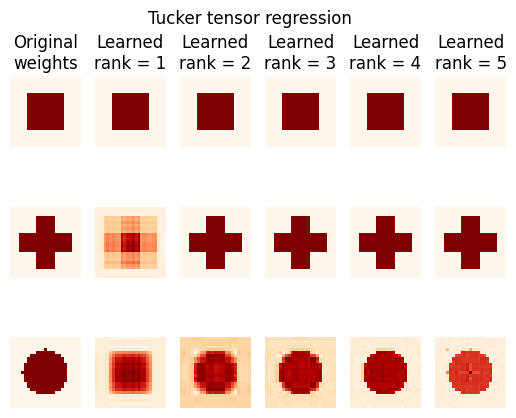

In [5]:
import matplotlib.pyplot as plt
from tensorly.base import tensor_to_vec, partial_tensor_to_vec
from tensorly.datasets.synthetic import gen_image
from tensorly.regression.tucker_regression import TuckerRegressor
import tensorly as tl

# Parameter of the experiment
image_height = 25
image_width = 25
# shape of the images
patterns = ["rectangle", "swiss", "circle"]
# ranks to test
ranks = [1, 2, 3, 4, 5]

# Generate random samples
rng = tl.check_random_state(1)
X = tl.tensor(rng.normal(size=(1000, image_height, image_width), loc=0, scale=1))

# Parameters of the plot, deduced from the data
n_rows = len(patterns)
n_columns = len(ranks) + 1
# Plot the three images
fig = plt.figure()

for i, pattern in enumerate(patterns):

    print(f"fitting pattern n.{i}")

    # Generate the original image
    weight_img = gen_image(
        region=pattern, image_height=image_height, image_width=image_width
    )
    weight_img = tl.tensor(weight_img)

    # Generate the labels
    y = tl.dot(partial_tensor_to_vec(X, skip_begin=1), tensor_to_vec(weight_img))

    # Plot the original weights
    ax = fig.add_subplot(n_rows, n_columns, i * n_columns + 1)
    ax.imshow(tl.to_numpy(weight_img), cmap=plt.cm.OrRd, interpolation="nearest")
    ax.set_axis_off()
    if i == 0:
        ax.set_title("Original\nweights")

    for j, rank in enumerate(ranks):
        print(f"fitting for rank = {rank}")

        # Create a tensor Regressor estimator
        estimator = TuckerRegressor(
            weight_ranks=[rank, rank], tol=10e-7, n_iter_max=100, reg_W=1, verbose=0
        )

        # Fit the estimator to the data
        estimator.fit(X, y)

        ax = fig.add_subplot(n_rows, n_columns, i * n_columns + j + 2)
        ax.imshow(
            tl.to_numpy(estimator.weight_tensor_),
            cmap=plt.cm.OrRd,
            interpolation="nearest",
        )
        ax.set_axis_off()

        if i == 0:
            ax.set_title(f"Learned\nrank = {rank}")

plt.suptitle("Tucker tensor regression")
plt.show()


In [6]:
import tensorly as tl
from tensorly.random import random_cp
from tensorly.cp_tensor import cp_permute_factors
import matplotlib.pyplot as plt

In [7]:
shape = (30, 40, 50)
rank = 4

# one reference cp tensor
cp_tensor_1 = random_cp(shape, rank)

# two target cp tensors
cp_tensor_2 = cp_tensor_1.cp_copy()
cp_tensor_3 = cp_tensor_1.cp_copy()

col_order_1 = [1, 0, 3, 2]
for f in range(3):
    cp_tensor_2.factors[f] = cp_tensor_2.factors[f][:, col_order_1]

col_order_2 = [3, 1, 2, 0]
for f in range(3):
    cp_tensor_3.factors[f] = cp_tensor_3.factors[f][:, col_order_2]

In [8]:
cp_tensors, permutation = cp_permute_factors(cp_tensor_1, [cp_tensor_2, cp_tensor_3])

In [9]:
print(permutation)

[array([1, 0, 3, 2]), array([3, 1, 2, 0])]


Text(0.5, 1.0, 'Permuted cp tensor')

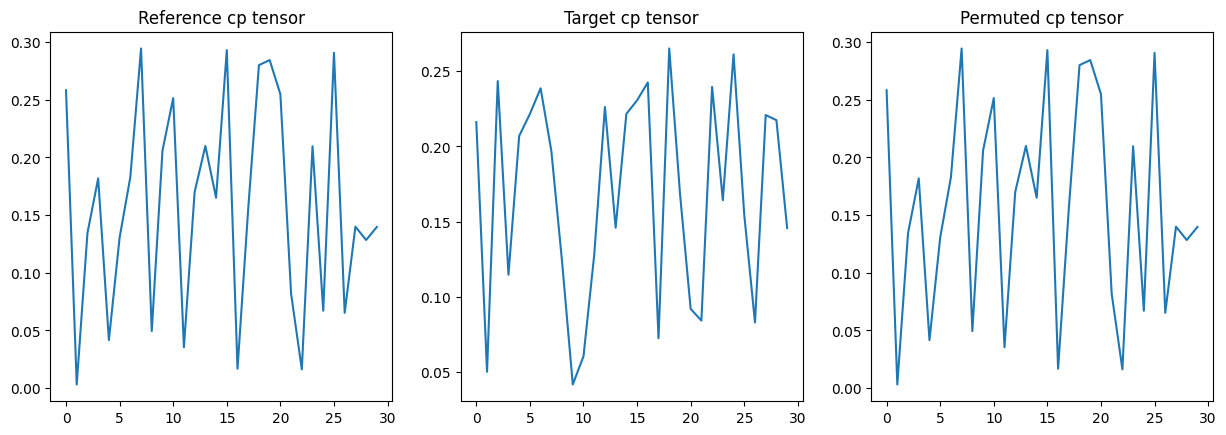

In [10]:
fig, axs = plt.subplots(1, 3)
plt.subplots_adjust(hspace=1.5)
fig.set_size_inches(15, fig.get_figheight(), forward=True)
axs[0].plot(cp_tensor_1.factors[0][:, 0].T)
axs[0].set_title("Reference cp tensor")
axs[1].plot(cp_tensor_2.factors[0][:, 0].T)
axs[1].set_title("Target cp tensor")
axs[2].plot(cp_tensors[0].factors[0][:, 0].T)
axs[2].set_title("Permuted cp tensor")

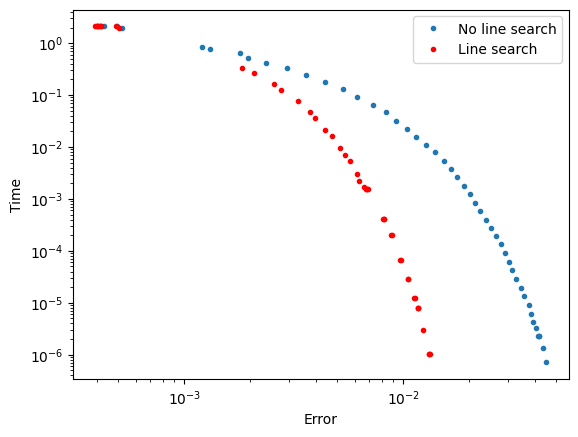

In [11]:
import matplotlib.pyplot as plt

from time import time
import numpy as np
import tensorly as tl
from tensorly.random import random_cp
from tensorly.decomposition import CP, parafac

tol = np.logspace(-1, -9)
err = np.empty_like(tol)
err_ls = np.empty_like(tol)
tt = np.empty_like(tol)
tt_ls = np.empty_like(tol)
tensor = random_cp((10, 10, 10), 3, random_state=1234, full=True)

# Get a high-accuracy decomposition for comparison
fac = parafac(tensor, rank=3, n_iter_max=2000000, tol=1.0e-15, linesearch=True)
err_min = tl.norm(tl.cp_to_tensor(fac) - tensor)

for ii, toll in enumerate(tol):
    # Run PARAFAC decomposition without line search and time
    start = time()
    cp = CP(rank=3, n_iter_max=2000000, tol=toll, linesearch=False)
    fac = cp.fit_transform(tensor)
    tt[ii] = time() - start
    err[ii] = tl.norm(tl.cp_to_tensor(fac) - tensor)

# Run PARAFAC decomposition with line search and time
for ii, toll in enumerate(tol):
    start = time()
    cp = CP(rank=3, n_iter_max=2000000, tol=toll, linesearch=True)
    fac_ls = cp.fit_transform(tensor)
    tt_ls[ii] = time() - start

    # Calculate the error of both decompositions
    err_ls[ii] = tl.norm(tl.cp_to_tensor(fac_ls) - tensor)


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.loglog(tt, err - err_min, ".", label="No line search")
ax.loglog(tt_ls, err_ls - err_min, ".r", label="Line search")
ax.legend()
ax.set_ylabel("Time")
ax.set_xlabel("Error")

plt.show()